In [3]:
import os
import glob
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.interpolate import make_interp_spline

In [4]:
train_data_dim = pd.read_csv("../data/processed/norm_train.csv")
train_data_dim = train_data_dim.shape[0]

In [5]:
params = {}
table_name = "estimation_info.csv"

for folder_name in glob.glob(str(Path("../artifacts/*"))):
    if os.path.isdir(folder_name):
        params[os.path.basename(folder_name)] = {}
        df = pd.read_csv(str(Path(folder_name, table_name)))
        params[os.path.basename(folder_name)] = df.to_dict("list")

In [6]:
name_encoder = {
    "gb_gsx": "Greedy Sampling by Input GBDT",
    "gpr_gsx": "Greedy Sampling by Input GPR",
    "gpr_gsy": "Greedy Sampling by Output GPR",
    "gpr_gsxy": "Greedy Sampling by Inputs & Outputs GPR",
    "gpr_qbc_uncertainity": "Query by committee GPR",
    "gpr_random": "Random GPR",
    "gpr_uncertainity": "Uncertainity GPR",
}

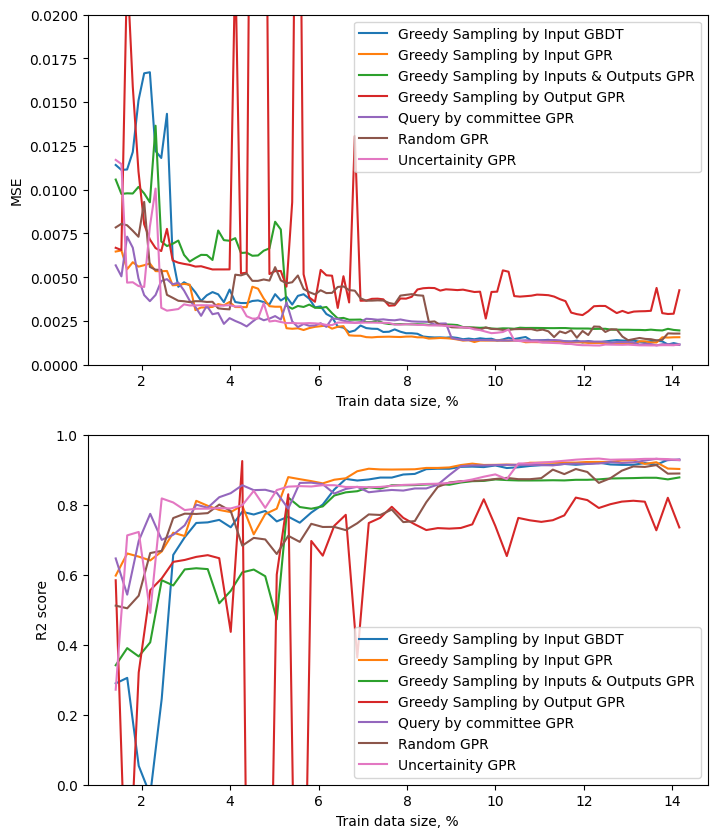

In [7]:
fig, axs = plt.subplots(2, 1)
fig.set_figwidth(8)
fig.set_figheight(10)

for type, metrics in params.items():
    label = name_encoder.get(type)
    percent_of_data = [i / train_data_dim * 100 for i in metrics["n_points"]]
    # percent_of_data = int((metrics['n_points'] / train_data_dim) * 100)
    x_sm = np.array(percent_of_data)
    y_sm1 = np.array(metrics["r2"])
    X_Y_spline = make_interp_spline(percent_of_data, metrics["r2"])
    X_ = np.linspace(x_sm.min(), x_sm.max(), 50)
    Y_ = X_Y_spline(X_)
    axs[1].plot(X_, Y_, label=label)
    axs[0].plot(percent_of_data, metrics["mse"], label=label)
axs[0].legend()
axs[0].set_ylim(0.0, 0.02)
axs[0].set_ylabel("MSE")
axs[1].legend()
axs[1].set_ylim(0.0, 1.0)
axs[1].set_ylabel("R2 score")
axs[0].set_xlabel("Train data size, %")
axs[1].set_xlabel("Train data size, %")
plt.show()